In [1]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)
# Iz imen stolpcev smo odstranili moteče besedilo – 'Stevilo prostih delovnih mest  - SKUPAJ'

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
delovna_mesta = pd.read_csv("../../podatki/delovna_mesta//prosta_delovna_mesta.csv", sep=";")

# Nadomestimo vse celice označene z 'N' z  vrednostjo 0
delovna_mesta = delovna_mesta.applymap(lambda x: 0 if x == 'N' else x)

# Odstranimo presledke na zadnjem mestu imena stolpca
delovna_mesta.columns = delovna_mesta.columns.str.rstrip()

# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo 'M' iz same vrednosti – npr. namesto '3822 M' bo sedaj vrednost '3822'
delovna_mesta.iloc[:, 1:] = delovna_mesta.iloc[:, 1:].applymap(lambda x: x.replace('M', '') if isinstance(x, str) else x)

# Pretvorimo stolpec 'CETRTLETJE' v tip string
delovna_mesta['CETRTLETJE'] = delovna_mesta['CETRTLETJE'].astype(str)
# Pretvorimo vse ostale stolpce v tip integer
delovna_mesta.iloc[:, 1:] = delovna_mesta.iloc[:, 1:].astype(int)

In [2]:
# Pregled urejenih in filtriranih podatkov
delovna_mesta

,CETRTLETJE,B RUDARSTVO,C PREDELOVALNE DEJAVNOSTI,"D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO","E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA",F GRADBENISTVO,"G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL",H PROMET IN SKLADISCENJE,I GOSTINSTVO,J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI,K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI,L POSLOVANJE Z NEPREMICNINAMI,"M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI",N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI,"O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI",P IZOBRAZEVANJE,Q ZDRAVSTVO IN SOCIALNO VARSTVO,"R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI",S DRUGE DEJAVNOSTI
0,2008Q1,15,1787,23,43,1985,1180,582,550,103,235,68,368,1062,152,152,284,62,115
1,2008Q2,8,1349,12,43,2010,1035,540,460,124,171,50,307,1130,121,526,253,52,117
2,2008Q3,14,1554,23,47,2009,1120,559,561,115,258,43,366,959,103,535,259,82,100
3,2008Q4,3,844,11,28,1352,676,379,347,93,124,30,279,542,106,161,195,64,73
4,2009Q1,8,876,14,29,1369,739,321,433,83,170,31,298,641,98,156,216,41,77
5,2009Q2,6,646,15,31,1238,585,263,434,56,129,33,270,549,86,599,186,35,76
6,2009Q3,3,860,14,30,820,717,340,364,79,100,38,330,434,66,570,177,46,83
7,2009Q4,5,717,10,18,647,584,250,284,57,121,31,210,382,61,196,163,50,64
8,2010Q1,3,727,26,28,651,564,237,281,93,132,23,357,433,75,137,207,41,66
9,2010Q2,17,892,15,26,833,591,302,398,80,128,30,337,565,74,493,207,40,64


In [3]:
# Izpis vseh kategorij
vse_kategorije = delovna_mesta.columns[1:]
for kategorija in vse_kategorije:
    print(kategorija)

B RUDARSTVO
C PREDELOVALNE DEJAVNOSTI
D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO
E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA
F GRADBENISTVO
G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL
H PROMET IN SKLADISCENJE
I GOSTINSTVO
J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI
K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI
L POSLOVANJE Z NEPREMICNINAMI
M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI
N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI
O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI
P IZOBRAZEVANJE
Q ZDRAVSTVO IN SOCIALNO VARSTVO
R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI
S DRUGE DEJAVNOSTI


In [4]:
# Pretvorba v .xlsx datoteko
# delovna_mesta.to_excel("filtered_prosta_delovna_mesta.xlsx")

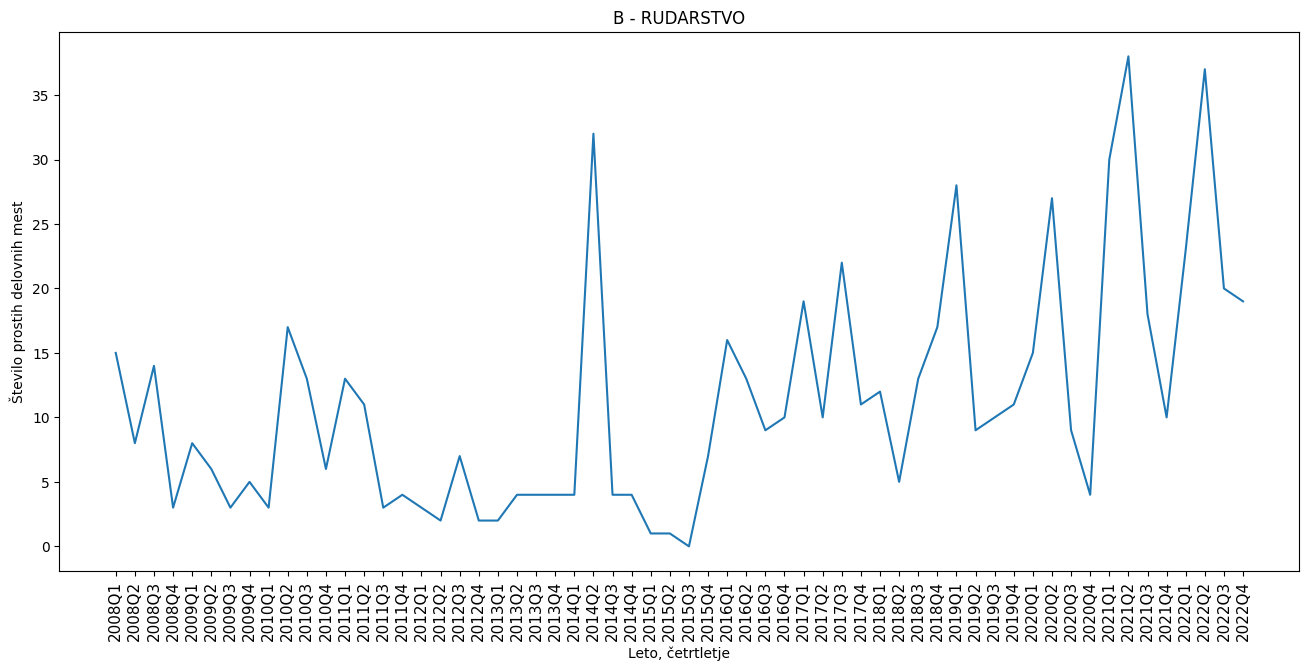

In [5]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['B RUDARSTVO'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('B - RUDARSTVO')
plt.show()

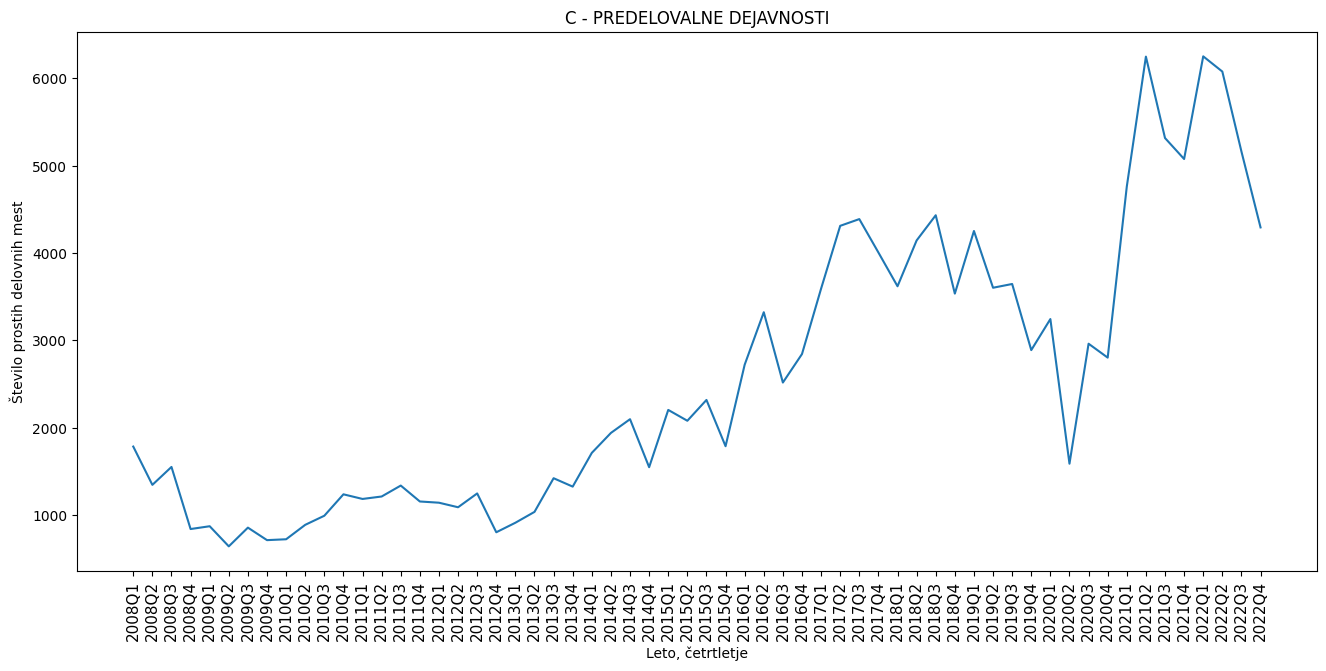

In [6]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['C PREDELOVALNE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('C - PREDELOVALNE DEJAVNOSTI')
plt.show()

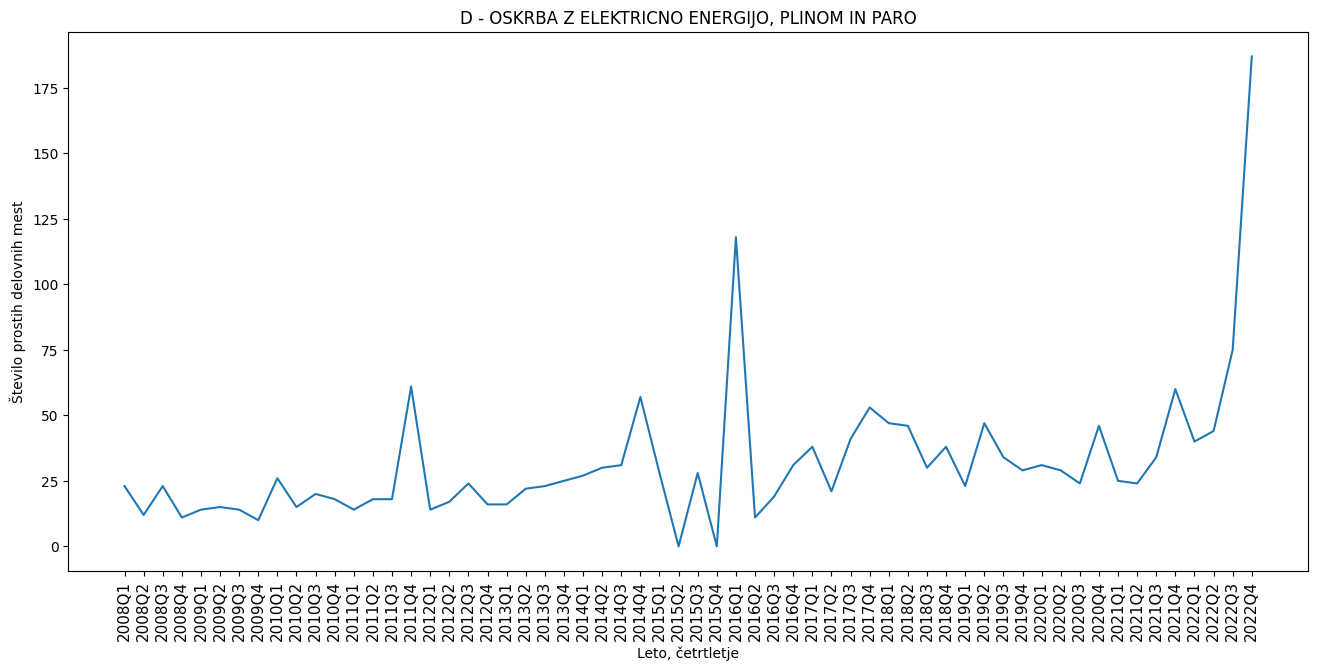

In [7]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('D - OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO')
plt.show()

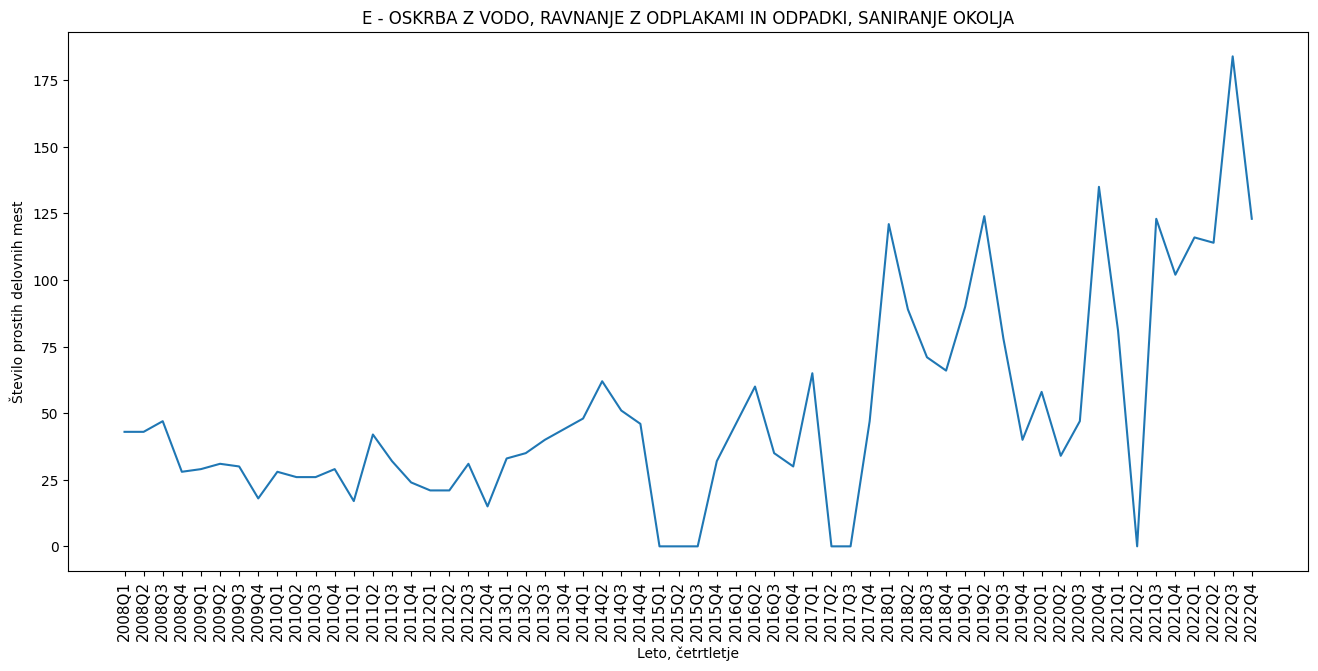

In [8]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('E - OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA')
plt.show()

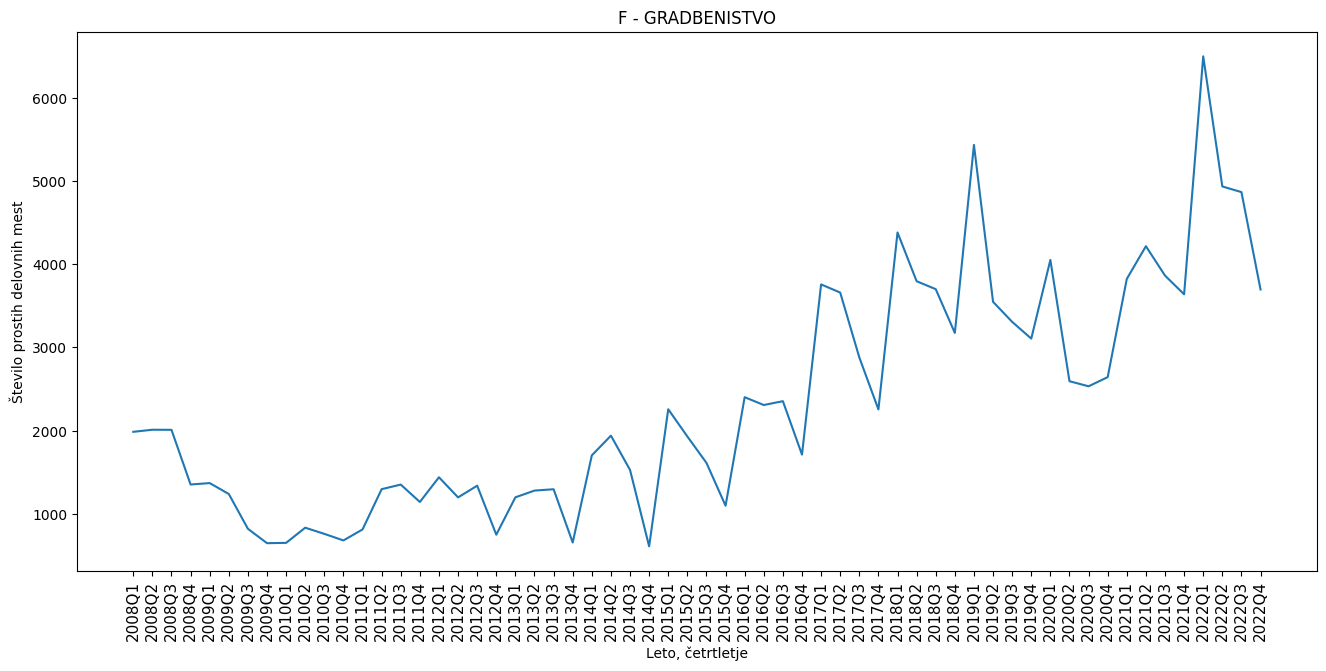

In [9]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['F GRADBENISTVO'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('F - GRADBENISTVO')
plt.show()

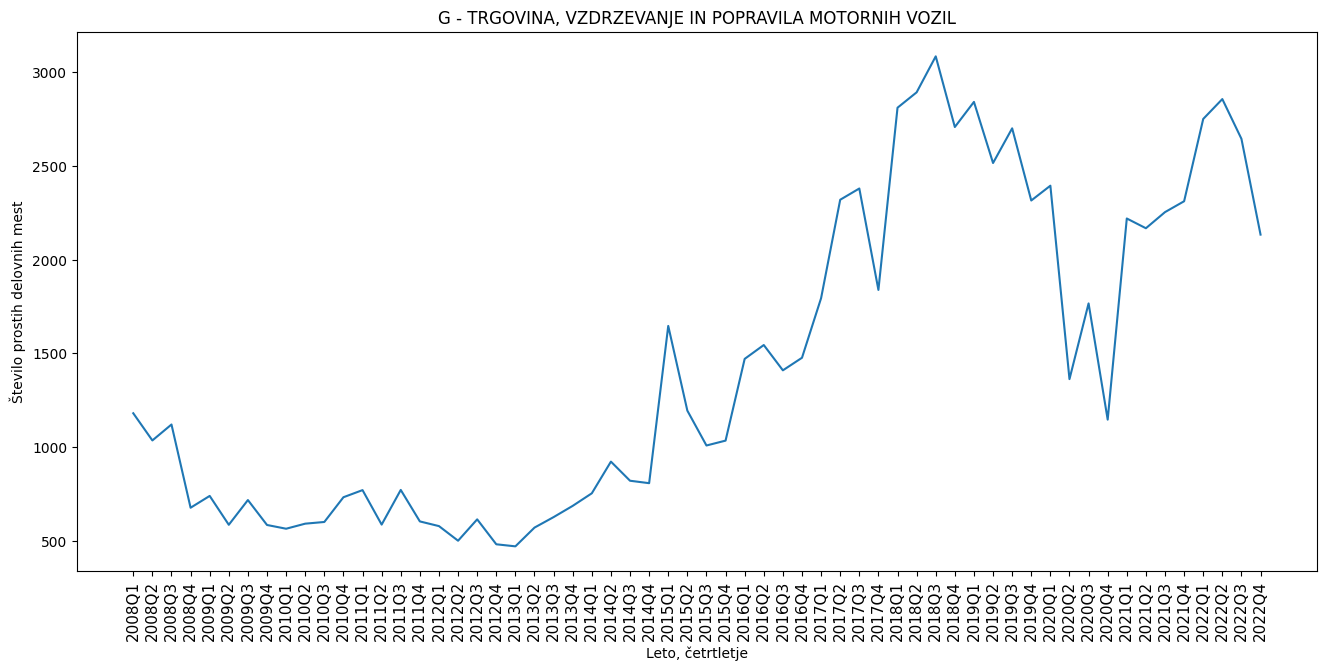

In [10]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('G - TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL')
plt.show()

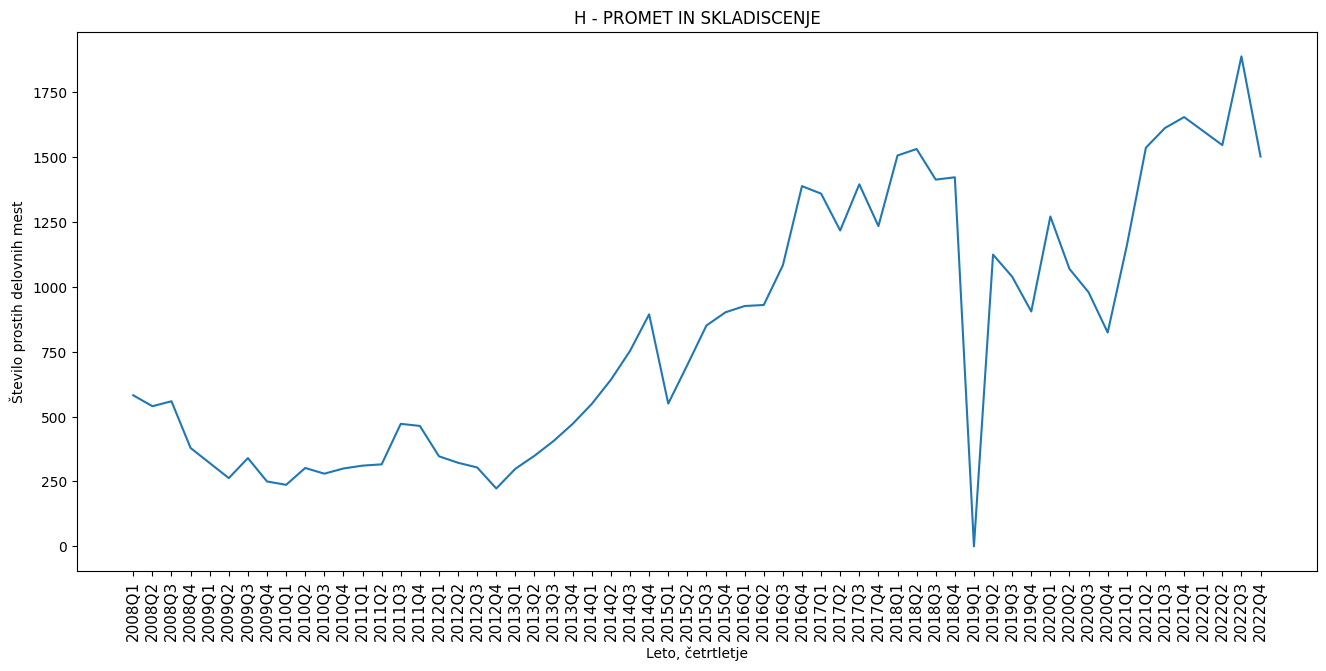

In [11]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['H PROMET IN SKLADISCENJE'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('H - PROMET IN SKLADISCENJE')
plt.show()

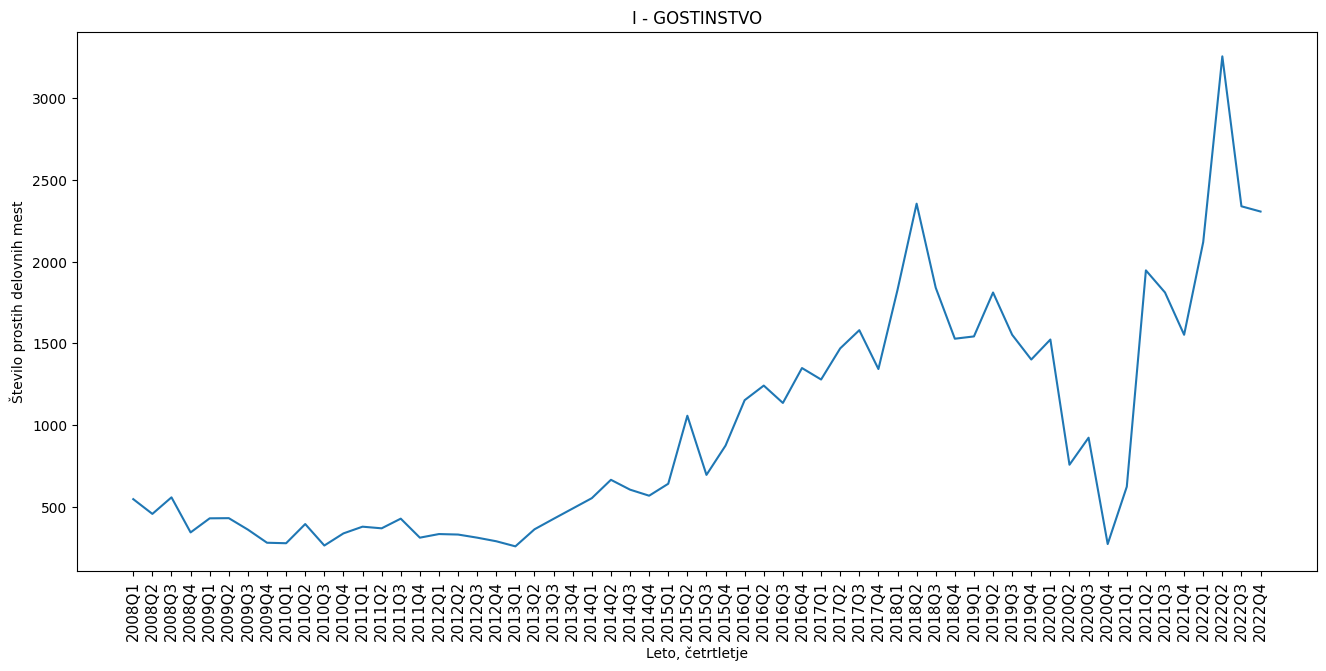

In [12]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['I GOSTINSTVO'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('I - GOSTINSTVO')
plt.show()

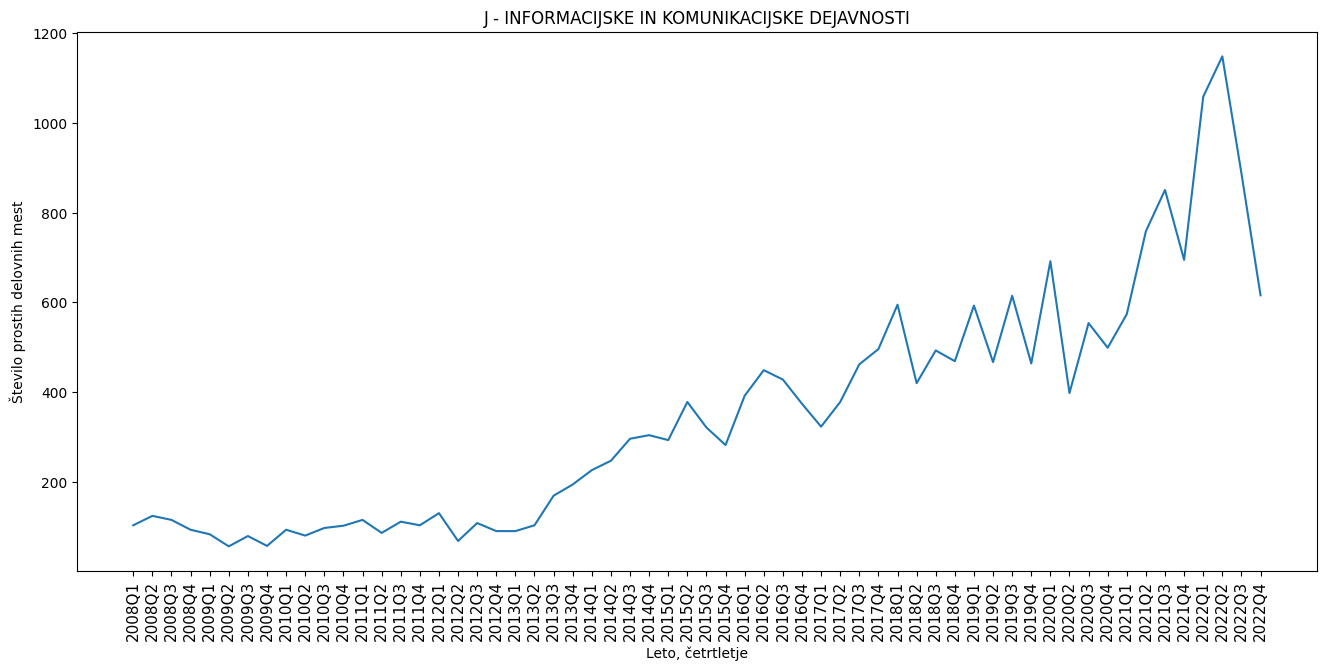

In [13]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('J - INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI')
plt.show()

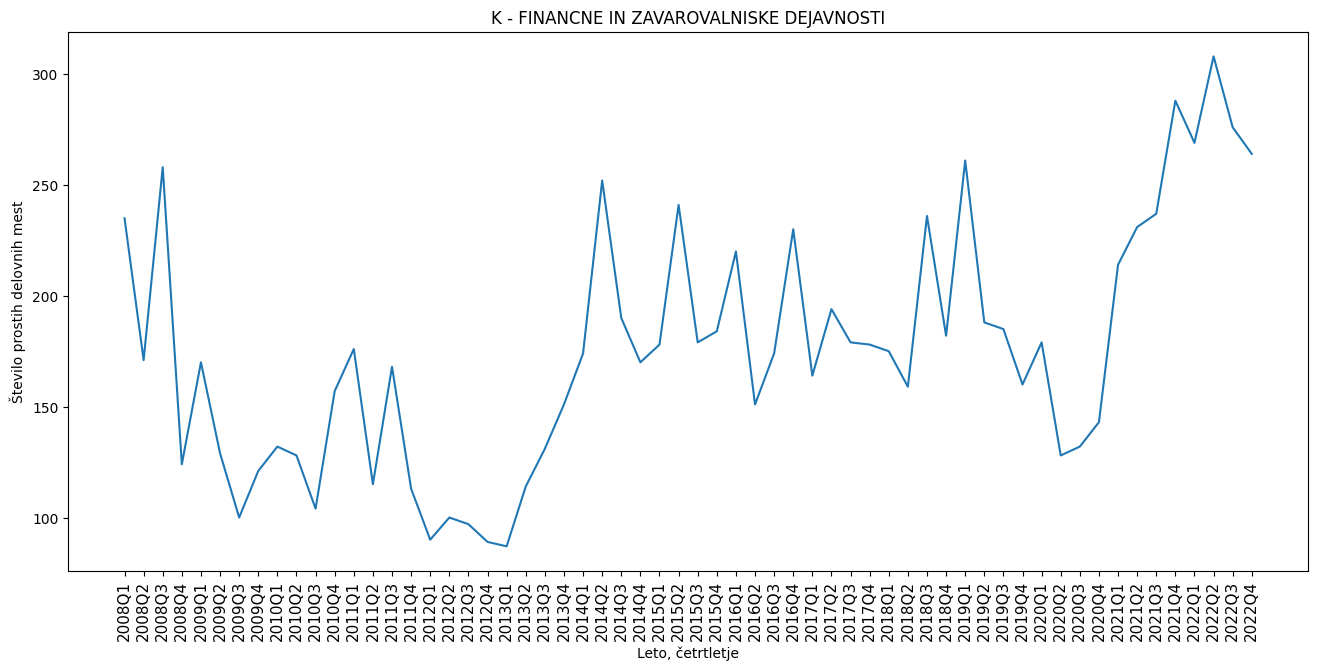

In [14]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('K - FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI')
plt.show()

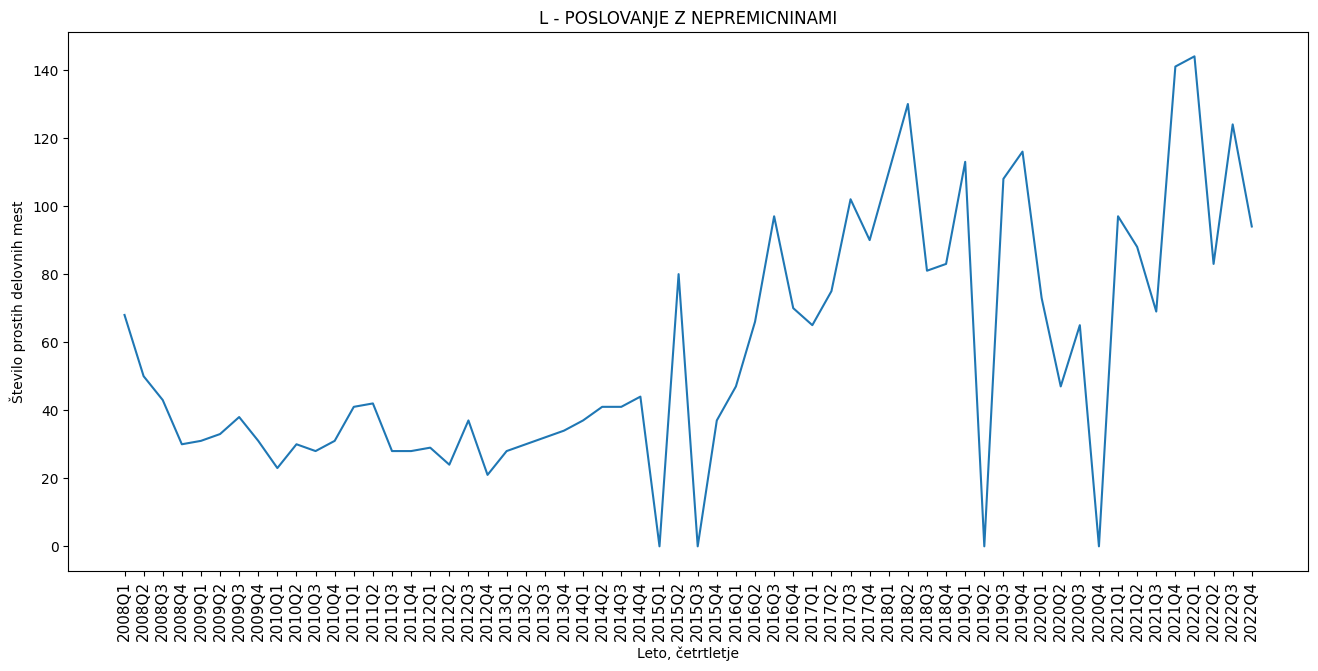

In [15]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['L POSLOVANJE Z NEPREMICNINAMI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('L - POSLOVANJE Z NEPREMICNINAMI')
plt.show()

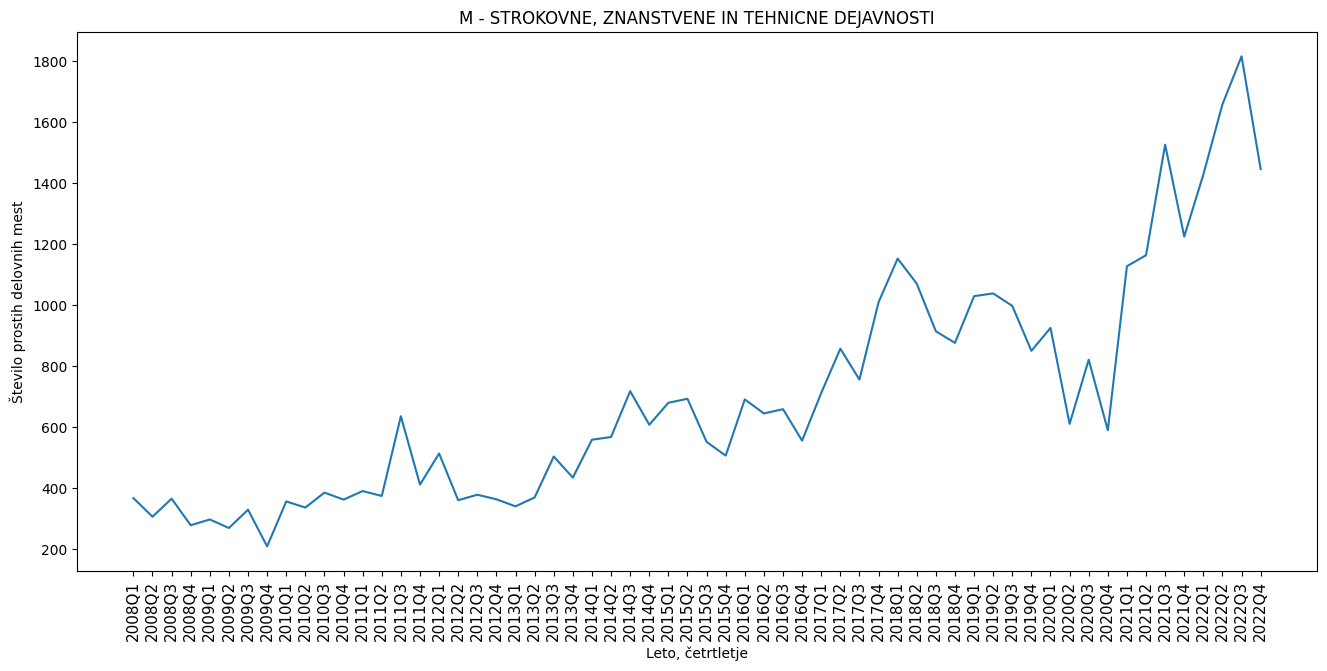

In [16]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('M - STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI')
plt.show()

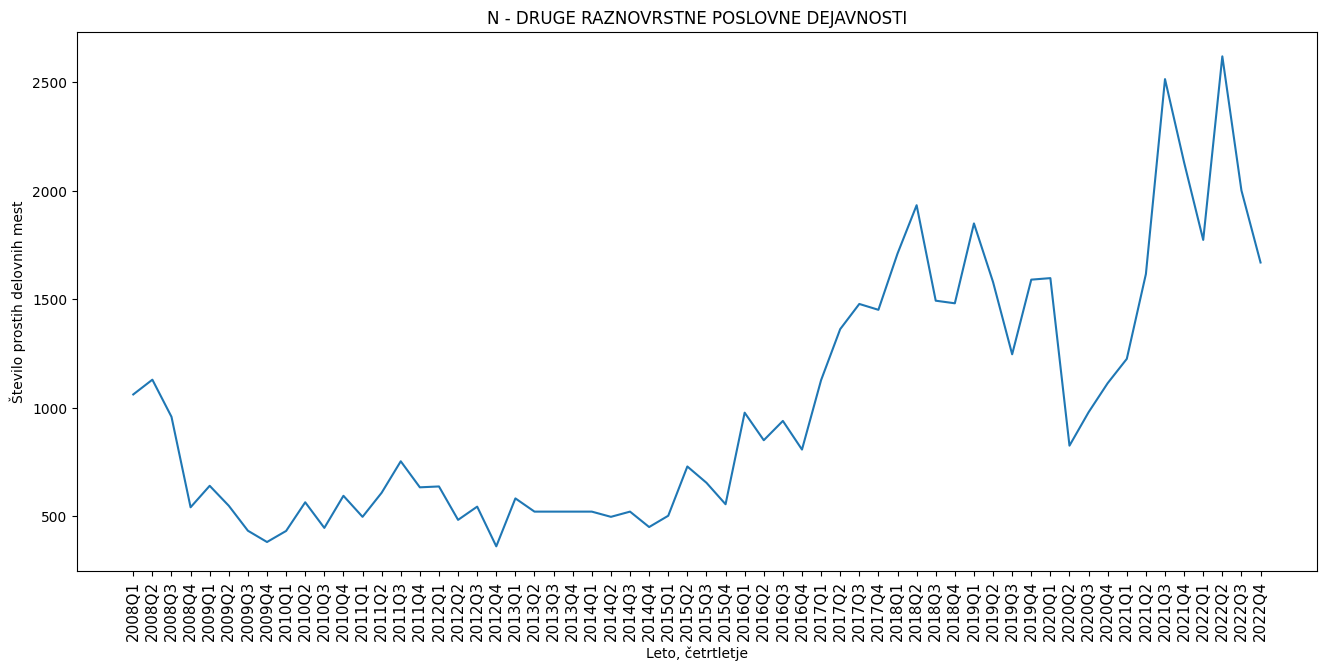

In [17]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('N - DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI')
plt.show()

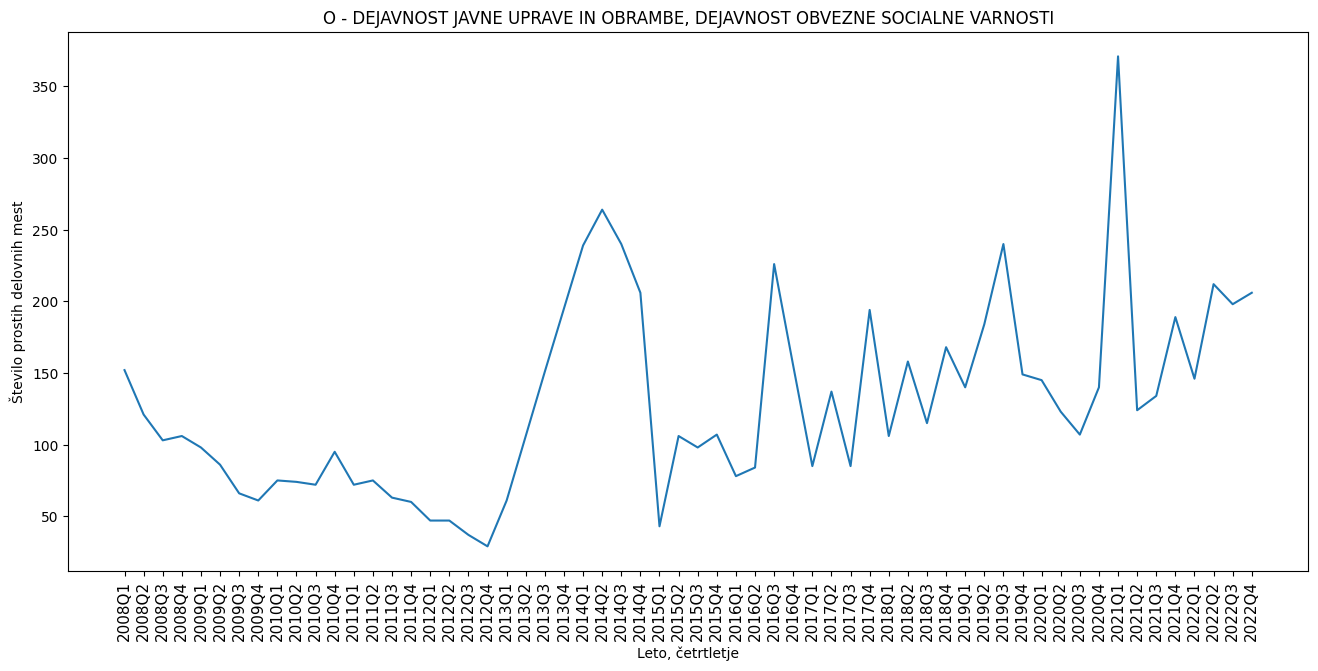

In [18]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('O - DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI')
plt.show()

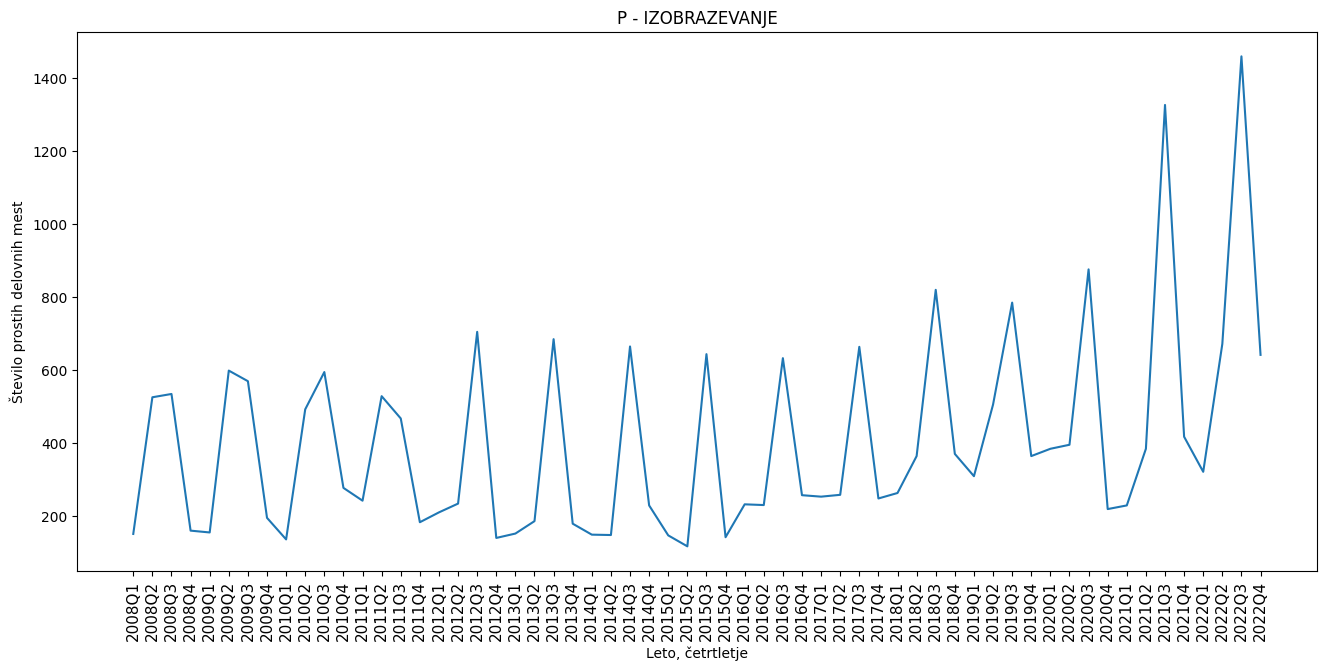

In [19]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['P IZOBRAZEVANJE'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('P - IZOBRAZEVANJE')
plt.show()

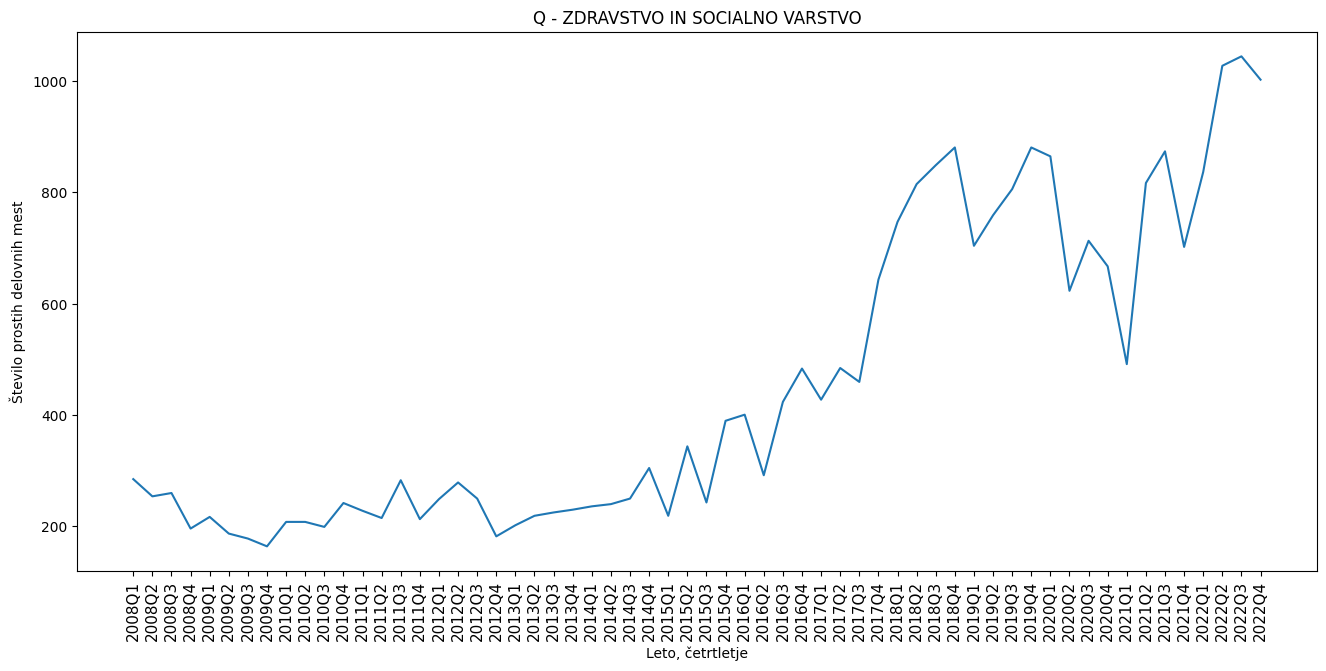

In [20]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['Q ZDRAVSTVO IN SOCIALNO VARSTVO'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('Q - ZDRAVSTVO IN SOCIALNO VARSTVO')
plt.show()

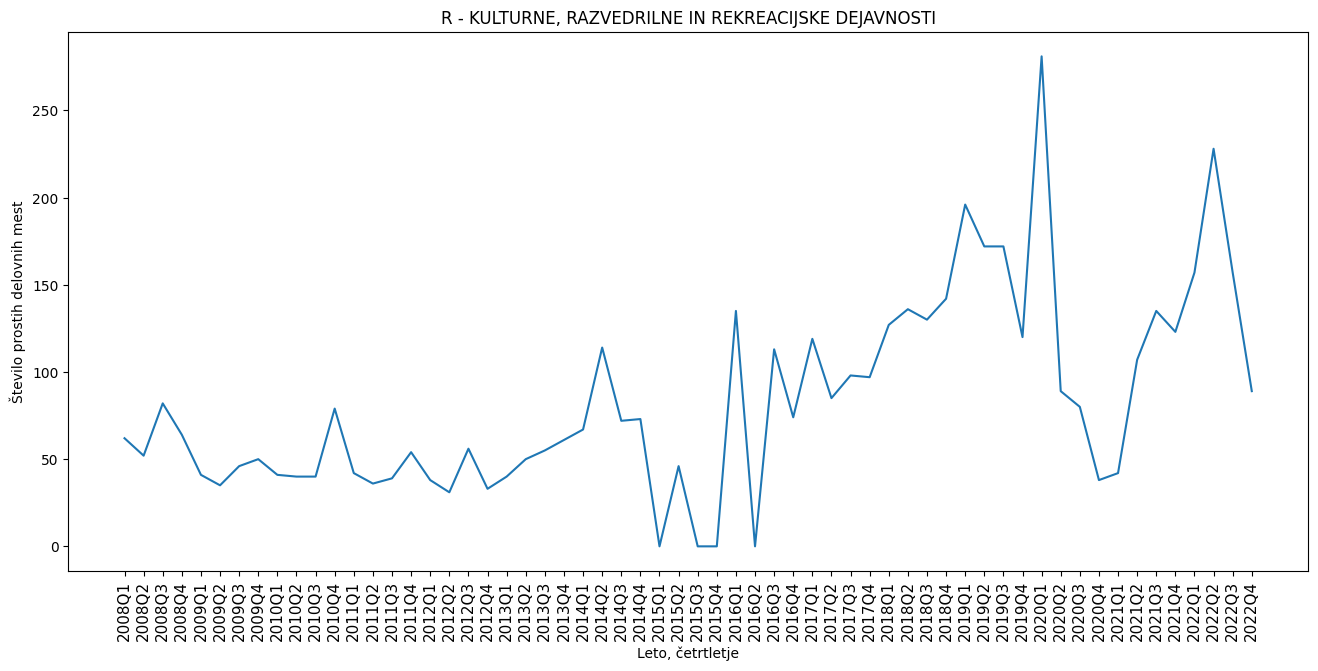

In [21]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('R - KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI')
plt.show()

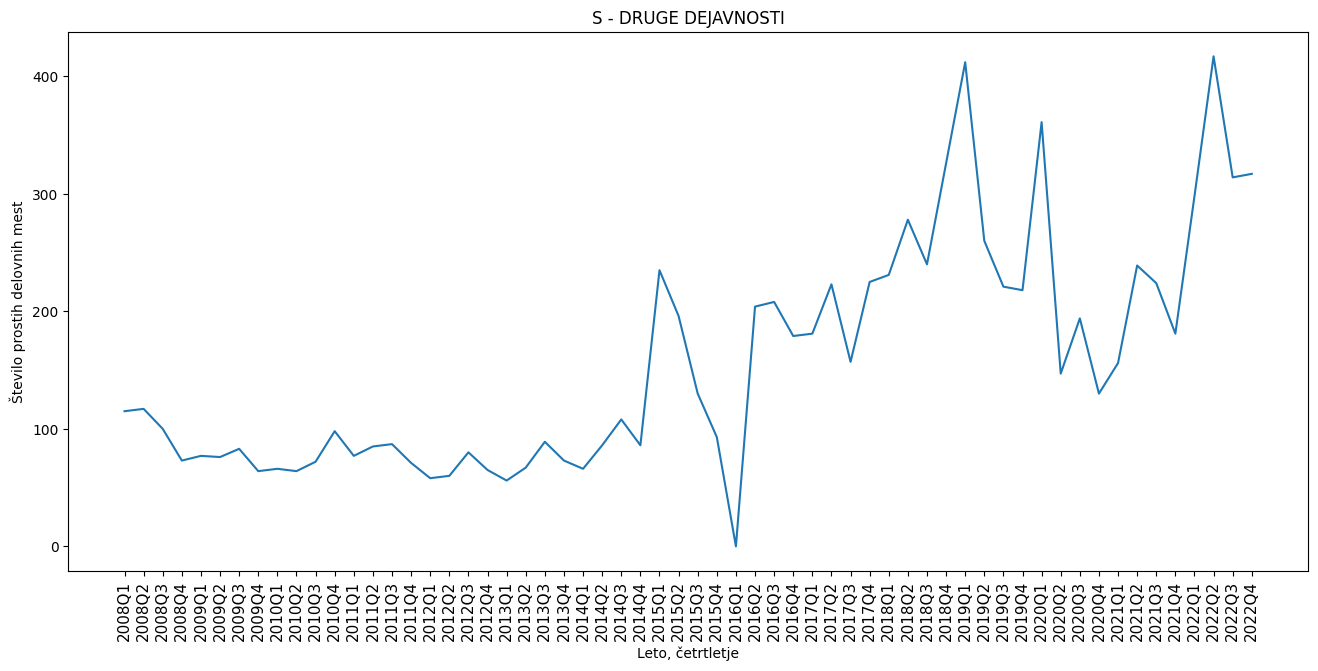

In [22]:
x_os = delovna_mesta['CETRTLETJE'].values
y_os = delovna_mesta['S DRUGE DEJAVNOSTI'].values

# Izrišemo graf
plt.figure(figsize=(16, 7))
plt.plot(x_os, y_os)
plt.xticks(fontsize=11)
plt.xticks(rotation=90)
plt.xlabel('Leto, četrtletje')
plt.ylabel('Število prostih delovnih mest')
plt.title('S - DRUGE DEJAVNOSTI')
plt.show()